## Описание проекта

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

***Цель исследования***
Определить, почему несмотря на вложения в рекламу, компания терпит убытки.

***Ход исследования***

1. Обзор данных, полученных из файлов /datasets/visits_info_short.csv, /datasets/orders_info_short.csv, /datasets/costs_info_short.csv.
2. Предобработка данных:
    - замена названий столбцов;
    - преборазование типов данных;
    - обработка пропусков и дубликатов при необходимости.
3. Проведение исследовательского анализа данных:
    - определение минимальных и максимальных дат привлечения пользователей;
    - создание пользовательских профилей;
    - определить, из каких стран и рекламных каналов, а также с каких устройств приходит больше всего пользователей; какие из них платят.
4. Проведение маркетингового исследования:
    - подсчет общей суммы расходов на маркетинг; распределение и визуализация трат по источникам;
    - подсчет средей стоимости привлечения пользователя для каждого источника.
5. Оценка окупаемости рекламы:
    - анализ общей окупаемости рекламы при моменте анализа 1 ноября 2019 и горизонте анализа в 14 дней;
    - анализ окупаемости рекламы с разбивкой по каналам, странам и устройствам;
    - визуализация конверсии и удержания с разбивкой по каналам, странам и устройствам;
    - ответ на вопросы:
        - Окупается ли реклама в целом?
        - Какие устройства, страны и каналы могут снижать окупаемость рекламы?
        - Чем могут быть вызваны проблемы окупаемости?
6. Общие выводы:
    - выявление причин неэффективности привлечения пользователей;
    - составление рекомендаций для отдела маркетинга.

***Описание данных***

Структура 'visits_info_short.csv':
- `User Id` — уникальный идентификатор пользователя,
- `Region` — страна пользователя,
- `Device` — тип устройства пользователя,
- `Channel` — идентификатор источника перехода,
- `Session Start` — дата и время начала сессии,
- `Session End` — дата и время окончания сессии.

Структура 'orders_info_short.csv':
- `User Id` — уникальный идентификатор пользователя,
- `Event Dt` — дата и время покупки,
- `Revenue` — сумма заказа.

Структура 'costs_info_short.csv':
- `Channel` — идентификатор рекламного источника,
- `Dt` — дата проведения рекламной кампании,
- `Costs` — расходы на эту кампанию.

## Обзор данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime as dt

!pip3 install plotly
import plotly.express as px
import plotly.graph_objs as go

from datetime import datetime, timedelta

In [2]:
# импорт
try:
    visits, orders, costs = (
        pd.read_csv('/datasets/visits_info_short.csv'),  # журнал сессий
        pd.read_csv('/datasets/orders_info_short.csv'),  # покупки
       pd.read_csv('/datasets/costs_info_short.csv'),  # траты на рекламу
    )
except:
        visits, orders, costs = (
        pd.read_csv('C:\\Users\\79199\\Documents\\Учёба\\Аналитика\\Сборные проекты\\СП-5\\visits_info_short.csv'),  # журнал сессий
        pd.read_csv('C:\\Users\\79199\\Documents\\Учёба\\Аналитика\\Сборные проекты\\СП-5\\orders_info_short.csv'),  # покупки
       pd.read_csv('C:\\Users\\79199\\Documents\\Учёба\\Аналитика\\Сборные проекты\\СП-5\\costs_info_short.csv'),  # траты на рекламу
    )
     

In [3]:
display(visits.head(15))
display(visits.info())
display(orders.head(15))
display(orders.info())
display(costs.head(15))
costs.info()

User Id         Region   Device         Channel        Session Start  \
0   981449118918  United States   iPhone         organic  2019-05-01 02:36:01   
1   278965908054  United States   iPhone         organic  2019-05-01 04:46:31   
2   590706206550  United States      Mac         organic  2019-05-01 14:09:25   
3   326433527971  United States  Android          TipTop  2019-05-01 00:29:59   
4   349773784594  United States      Mac         organic  2019-05-01 03:33:35   
5    90242400005  United States   iPhone  RocketSuperAds  2019-05-01 07:14:52   
6    43958116050  United States  Android         organic  2019-05-01 09:03:21   
7   185365244969  United States   iPhone         organic  2019-05-01 09:37:03   
8   446013509831  United States   iPhone  RocketSuperAds  2019-05-01 10:26:00   
9   100970711362  United States      Mac          TipTop  2019-05-01 04:39:53   
10  589320347244  United States      Mac         YRabbit  2019-05-01 18:39:23   
11  370455852550  United States   iPhone         organic  2019-05-01 14:44:30   
12  141837741427  United States      Mac        FaceBoom  2019-05-01 06:20:48   
13  924308873083  United States   iPhone         organic  2019-05-01 20:03:52   
14  774938424092  United States   iPhone    MediaTornado  2019-05-01 14:01:40   

            Session End  
0   2019-05-01 02:45:01  
1   2019-05-01 04:47:35  
2   2019-05-01 15:32:08  
3   2019-05-01 00:54:25  
4   2019-05-01 03:57:40  
5   2019-05-01 08:19:56  
6   2019-05-01 10:08:39  
7   2019-05-01 10:00:43  
8   2019-05-01 10:59:17  
9   2019-05-01 04:57:05  
10  2019-05-01 20:03:15  
11  2019-05-01 15:41:24  
12  2019-05-01 06:54:33  
13  2019-05-01 20:19:34  
14  2019-05-01 14:29:24

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

User Id             Event Dt  Revenue
0   188246423999  2019-05-01 23:09:52     4.99
1   174361394180  2019-05-01 12:24:04     4.99
2   529610067795  2019-05-01 11:34:04     4.99
3   319939546352  2019-05-01 15:34:40     4.99
4   366000285810  2019-05-01 13:59:51     4.99
5   129100331057  2019-05-01 01:56:28     4.99
6   626807144131  2019-05-01 02:39:21     4.99
7   914062168985  2019-05-01 02:02:18     4.99
8   769669137453  2019-05-01 03:39:47     4.99
9   434198630691  2019-05-01 18:16:50     5.99
10  846285993293  2019-05-01 13:14:07     4.99
11   64474110919  2019-05-01 02:21:45     4.99
12   68752468250  2019-05-01 20:25:33     4.99
13  946239768828  2019-05-01 21:11:24     4.99
14  872148430066  2019-05-01 09:18:02     4.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

dt   Channel  costs
0   2019-05-01  FaceBoom  113.3
1   2019-05-02  FaceBoom   78.1
2   2019-05-03  FaceBoom   85.8
3   2019-05-04  FaceBoom  136.4
4   2019-05-05  FaceBoom  122.1
5   2019-05-06  FaceBoom  118.8
6   2019-05-07  FaceBoom  101.2
7   2019-05-08  FaceBoom  100.1
8   2019-05-09  FaceBoom   93.5
9   2019-05-10  FaceBoom  104.5
10  2019-05-11  FaceBoom  132.0
11  2019-05-12  FaceBoom  100.1
12  2019-05-13  FaceBoom  105.6
13  2019-05-14  FaceBoom   92.4
14  2019-05-15  FaceBoom  100.1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Мы видим следующие проблемы:
- некорректно заданы названия столбцов;
- столбцы с датами и временем используется формат `object`.

Заменим названия столбцов, применим змеиный регистр; преобразуем данные о времени в формат `datetime`. Проверим датасеты на наличие явных и скрытых дубликатов.

In [4]:
# переименование столбцов
visits = visits.rename(columns={'User Id':'user_id', 'Region':'region', 'Device':'device', 'Channel' : 'channel', 'Session Start':'session_start', 'Session End' : 'session_end'})
orders = orders.rename(columns={'User Id' : 'user_id', 'Event Dt' : 'event_dt', 'Revenue' : 'revenue'})
costs = costs.rename(columns={'Channel' : 'channel'})

In [5]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [6]:
visits.duplicated().sum() # подсчёт явных дубликатов

0

In [7]:
orders.duplicated().sum()

0

In [8]:
costs.duplicated().sum()

0

In [9]:
visits['region'].sort_values().unique() # поиск неявных дубликатов

array(['France', 'Germany', 'UK', 'United States'], dtype=object)

In [10]:
visits['device'].sort_values().unique() 

array(['Android', 'Mac', 'PC', 'iPhone'], dtype=object)

In [11]:
visits['channel'].sort_values().unique() 

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds', 'organic'], dtype=object)

In [12]:
costs['channel'].sort_values().unique() 

array(['AdNonSense', 'FaceBoom', 'LeapBob', 'MediaTornado',
       'OppleCreativeMedia', 'RocketSuperAds', 'TipTop', 'WahooNetBanner',
       'YRabbit', 'lambdaMediaAds'], dtype=object)

Дубликатов не выявлено.

## Функции для дальнейшего анализа

Зададим функции для создания профилей, расчёта удержания, конверсии, LTV и ROI: get_profiles(), get_retention(), get_conversion(), get_ltv().

In [13]:
# функция для профиля пользователя

events = None
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    profiles['dt'] = profiles['first_ts'].dt.date.astype('datetime64[ns]')
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [14]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [15]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [16]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Функции для визуализации метрик

In [17]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [18]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [19]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [20]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

Для начала получим профили пользователей.

In [21]:
profiles = get_profiles(visits, orders, events, costs)
profiles.head(15)

user_id            first_ts         channel   device         region  \
0     599326 2019-05-07 20:58:57        FaceBoom      Mac  United States   
1    4919697 2019-07-09 12:46:07        FaceBoom   iPhone  United States   
2    6085896 2019-10-01 09:58:33         organic   iPhone         France   
3   22593348 2019-08-22 21:35:48      AdNonSense       PC        Germany   
4   31989216 2019-10-02 00:07:44         YRabbit   iPhone  United States   
5   34186288 2019-05-09 17:29:23         organic  Android  United States   
6   38448301 2019-08-16 11:56:00         organic  Android  United States   
7   46006712 2019-06-30 03:46:29      AdNonSense  Android         France   
8   58263264 2019-05-11 19:18:43        FaceBoom   iPhone  United States   
9   59835779 2019-05-11 21:13:47    MediaTornado   iPhone  United States   
10  62222884 2019-06-19 15:14:57         organic   iPhone        Germany   
11  64614231 2019-10-22 09:51:19         organic  Android             UK   
12  69985732 2019-10-09 21:36:33  RocketSuperAds      Mac  United States   
13  79685390 2019-09-20 01:34:56         organic      Mac  United States   
14  80600926 2019-08-04 07:59:00         organic       PC             UK   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  
5  2019-05-09 2019-05-01  False          0.000000  
6  2019-08-16 2019-08-01  False          0.000000  
7  2019-06-30 2019-06-01   True          1.008000  
8  2019-05-11 2019-05-01  False          1.128205  
9  2019-05-11 2019-05-01  False          0.250435  
10 2019-06-19 2019-06-01  False          0.000000  
11 2019-10-22 2019-10-01  False          0.000000  
12 2019-10-09 2019-10-01  False          0.251613  
13 2019-09-20 2019-09-01  False          0.000000  
14 2019-08-04 2019-08-01  False          0.000000

### 3.2 Минимальные и максимальные даты

In [22]:
#минимальные и максимальные даты:
profiles['dt'] = pd.to_datetime(profiles['dt'])
display(profiles['dt'].dt.date.min())
profiles['dt'].dt.date.max()

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

#### Разбивка по странам

In [23]:
profiles.groupby('region').agg({'user_id' : 'nunique'})

user_id
region                
France           17450
Germany          14981
UK               17575
United States   100002

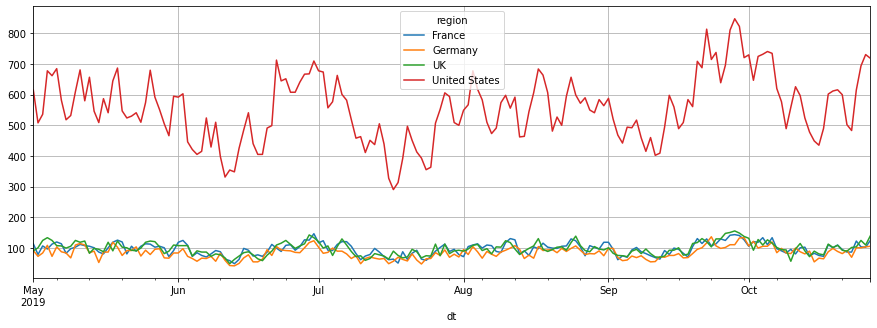

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='region',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.show()

In [25]:
# платящие пользователи
profiles.groupby('region').agg({'user_id' : 'nunique', 'payer' : 'sum'})

user_id  payer
region                       
France           17450    663
Germany          14981    616
UK               17575    700
United States   100002   6902

#### Разбивка по устройствам

In [26]:
profiles.groupby('device').agg({'user_id' : 'nunique'})

user_id
device          
Android    35032
Mac        30042
PC         30455
iPhone     54479

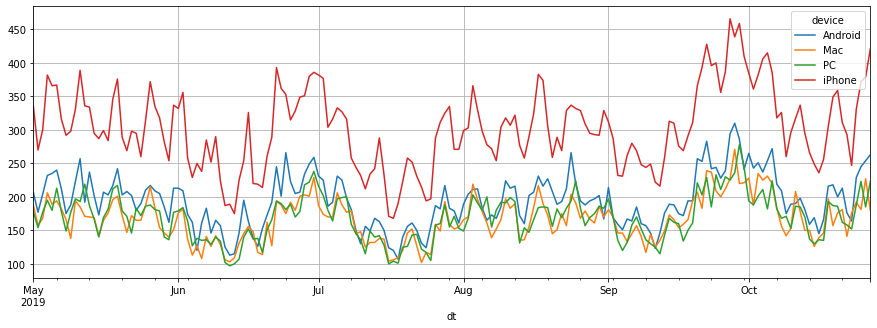

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='device',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.show()

In [28]:
# платящие пользователи
profiles.groupby('device').agg({'user_id' : 'nunique', 'payer' : 'sum'})

user_id  payer
device                 
Android    35032   2050
Mac        30042   1912
PC         30455   1537
iPhone     54479   3382

#### Разбивка по каналам привлечения

In [29]:
profiles.groupby('channel').agg({'user_id' : 'nunique'})

user_id
channel                    
AdNonSense             3880
FaceBoom              29144
LeapBob                8553
MediaTornado           4364
OppleCreativeMedia     8605
RocketSuperAds         4448
TipTop                19561
WahooNetBanner         8553
YRabbit                4312
lambdaMediaAds         2149
organic               56439

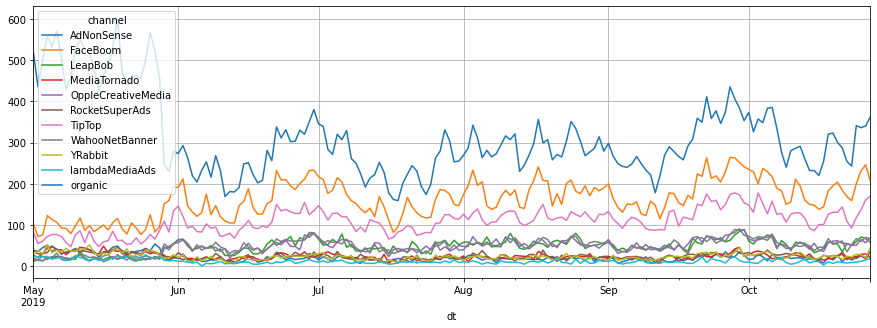

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='channel',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.show()

In [31]:
# платящие пользователи
profiles.groupby('channel').agg({'user_id' : 'nunique', 'payer' : 'sum'})

user_id  payer
channel                           
AdNonSense             3880    440
FaceBoom              29144   3557
LeapBob                8553    262
MediaTornado           4364    156
OppleCreativeMedia     8605    233
RocketSuperAds         4448    352
TipTop                19561   1878
WahooNetBanner         8553    453
YRabbit                4312    165
lambdaMediaAds         2149    225
organic               56439   1160

Промежуточные выводы:
- наибольшее количество пользователей находится в США;
- большая часть их часть использует iPhone, остальные практически равномерно распределены между Mac, PC и Android;
- топ-3 канала по привлечению пользователей - органика, FaceBoom и TipTop.

Рассмотрим долю платящих пользователей по всем трем параметрам (страна, канал привлечения, устройство).

In [32]:
# функция для расчета платящих пользователей
def user_profiles(df, grouping):
    paying_users = df['payer'].count()
    
    profile = df \
                .groupby(grouping) \
                .agg({'user_id' : 'count', 'payer' : 'sum'}) \
                .sort_values(by='payer', ascending=False) \
                .rename(columns={'user_id' : 'users', 'payer' : 'paying_users'}) \
                .reset_index()
    profile['percentage_paying_users'] = (profile['paying_users'] / profile['users'] * 100).round(2)
    
    return profile

In [33]:
profile = profiles \
                .groupby('region') \
                .agg({'user_id' : 'count', 'payer' : 'sum'}) \
                .sort_values(by='payer', ascending=False) \
                .rename(columns={'user_id' : 'users', 'payer' : 'paying_users'}) \
                .reset_index()
profile

region   users  paying_users
0  United States  100002          6902
1             UK   17575           700
2         France   17450           663
3        Germany   14981           616

In [34]:
def plot_stats(df, x_param, y_param1, y_param2, name1, name2, title, xtitle, ytitle):
    fig = go.Figure()

    fig.add_trace(go.Bar(x=df[x_param],
                         y=df[y_param1],
                         name=name1,
                         text=df[y_param1]),
                 )

    fig.add_trace(go.Bar(x=df[x_param],
                         y=df[y_param2],
                         name=name2,
                         text=df[y_param2]),
                 )

    fig.update_traces(textfont_size=10)
    fig.update_layout(
        title=title,
        xaxis_title=xtitle,
        yaxis_title=ytitle
    )
    fig.show()

def histplot(df, column, title):
    fig = px.histogram(df, x=column, title=title, text_auto=True)
    fig.update_layout(bargap=0.2)
    
    return fig

def lineplot(df, x, y, title):
    fig = px.line(df, x=x, y=y, title=title)
    
    return fig

def lineplot_2d(df, x, y, c, title):
    fig = px.line(df, x=x, y=y, color=c, title=title)
    
    return fig

def scatterplot(df, x, y, title):
    fig = px.scatter(df, x=x, y=y, title=title)
    
    return fig

def barplot(df, x, y, title):
    fig = px.bar(df, x=x, y=y, title=title, text_auto=True)
    
    return fig

In [35]:
countries = user_profiles(profiles, 'region')
devices = user_profiles(profiles, 'device')
channels = user_profiles(profiles, 'channel')

In [36]:
countries

region   users  paying_users  percentage_paying_users
0  United States  100002          6902                     6.90
1             UK   17575           700                     3.98
2         France   17450           663                     3.80
3        Germany   14981           616                     4.11

In [37]:
plot_stats(
    countries,
    'region',
    'users',
    'paying_users',
    'Пользователи',
    'Платящие пользователи',
    'Пользователи по странам',
    'Страна',
    'Кол-во пользователей'
)

In [38]:
devices

device  users  paying_users  percentage_paying_users
0   iPhone  54479          3382                     6.21
1  Android  35032          2050                     5.85
2      Mac  30042          1912                     6.36
3       PC  30455          1537                     5.05

In [39]:
plot_stats(
    devices,
    'device',
    'users',
    'paying_users',
    'Пользователи',
    'Платящие пользователи',
    'Пользователи по устройствам',
    'Устройство',
    'Кол-во пользователей'
)

In [40]:
channels

channel  users  paying_users  percentage_paying_users
0             FaceBoom  29144          3557                    12.20
1               TipTop  19561          1878                     9.60
2              organic  56439          1160                     2.06
3       WahooNetBanner   8553           453                     5.30
4           AdNonSense   3880           440                    11.34
5       RocketSuperAds   4448           352                     7.91
6              LeapBob   8553           262                     3.06
7   OppleCreativeMedia   8605           233                     2.71
8       lambdaMediaAds   2149           225                    10.47
9              YRabbit   4312           165                     3.83
10        MediaTornado   4364           156                     3.57

In [41]:
plot_stats(
    channels,
    'channel',
    'users',
    'paying_users',
    'Пользователи',
    'Платящие пользователи',
    'Пользователи по каналам привлечения',
    'Канал привлечения',
    'Кол-во пользователей'
)

Выводы:
- абсолютным лидером по количеству пользователей являются США (более 100 000 пользователей), с долей платящих 6,9%;
- на первом месте среди используемых устройств находится iPhone (платящие пользователи 6,21%), затем следуют Android, Mac, на последнем месте PC;
- больше всего среди пользователей - тех, кто пришел самостоятельно; на втором месте по привлечению - Faceboom с долей платящих 12,24%, на третьем - TipTop (доля платящих 9,6%).

## 4. Маркетинг

Посчитаем общую сумму расходов на маркетинг.

In [42]:
total_costs = costs['costs'].sum()
print('Общая сумма расходов: ', total_costs)

Общая сумма расходов:  105497.30000000002


In [43]:
# расходы по каналам привлечения
channel_costs = costs.groupby('channel').agg({'costs' : 'sum'}).sort_values(by='costs', ascending=False).reset_index()
channel_costs 

channel     costs
0              TipTop  54751.30
1            FaceBoom  32445.60
2      WahooNetBanner   5151.00
3          AdNonSense   3911.25
4  OppleCreativeMedia   2151.25
5      RocketSuperAds   1833.00
6             LeapBob   1797.60
7      lambdaMediaAds   1557.60
8        MediaTornado    954.48
9             YRabbit    944.22

<AxesSubplot:title={'center':'Распределение трат по источникам'}, xlabel='channel'>

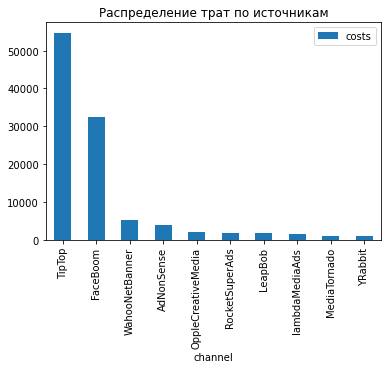

In [44]:
channel_costs.plot.bar(x='channel', y='costs', title='Распределение трат по источникам')

Выводы:большая часть расходов на рекламу приходится на каналы FaceBoom и TipTop. Неудивительно, что именно на них приходится основная масса привлеченных пользователей.

### Изменения метрик во времени

Сопоставим траты на рекламу во времени и пользовательскую активность (DAU,WAU,MAU).

Начнем с оценки пользовательской активности.

In [45]:
visits['date'] = visits['session_start'].dt.date
visits['year'] = visits['session_start'].dt.year
visits['month'] = visits['session_start'].dt.month
visits['week'] = visits['session_start'].dt.week #

dau = visits.groupby('date').agg({'user_id': 'nunique'}).reset_index()

wau = visits.groupby('week').agg({'user_id': 'nunique'}).reset_index()

mau = visits.groupby('month').agg({'user_id': 'nunique'}).reset_index()


C:\Users\79199\AppData\Local\Temp/ipykernel_10540/2768681577.py:4: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [46]:
# визуализация посещаемости сервиса - пользователей в день
lineplot(dau, x='date', y='user_id', title='DAU')

In [47]:
# визуализация посещаемости сервиса - пользователей в неделю
lineplot(wau, x='week', y='user_id', title='WAU')

In [48]:
# визуализация посещаемости сервиса - пользователей в месяц
lineplot(mau, x='month', y='user_id', title='MAU')

Выводы:
- в целом посещаемость постепенно растет; особенно резкий рост наметился после июля;
- ежедневная активность пользователей состоит из пиков и падений, которые в общих чертах совпадают с тратами на рекламу (см.ниже);
- на графиках ежедневной и еженедельной активности пользователей видно резкое падение в конце рассматриваемого периода (октябрь 2019 г.)

### Изменение затрат во времени по каналам

Остановимся подробнее на динамике расходов на рекламу с разбивкой по каналам привлечения.

In [49]:
costs_per_month = costs.copy(deep=True)
costs_per_month['dt'] = pd.to_datetime(costs_per_month['dt'])
costs_per_month['month'] = costs_per_month['dt'].dt.month
costs_per_month['week'] = costs_per_month['dt'].dt.week

costs_per_month_channel = costs_per_month.groupby(['month', 'channel']).agg({'costs': 'sum'}).reset_index()

costs_per_week_channel = costs_per_month.groupby(['week', 'channel']).agg({'costs': 'sum'}).reset_index()

costs_per_day_channel = costs_per_month.groupby(['dt', 'channel']).agg({'costs': 'sum'}).reset_index()


C:\Users\79199\AppData\Local\Temp/ipykernel_10540/3371689207.py:4: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [50]:
# визуализация изменения затрат на рекламу по дням в разрезе по каналам
fig = lineplot_2d(costs_per_day_channel, 
               x='dt', 
               y='costs', 
               c='channel', 
               title='Изменение затрат во времени (дни) в разрезе источников')

fig.update_layout(
    xaxis_title='Дата',
    yaxis_title='Суммарные затраты',
)

In [51]:
# визуализация изменения затрат на рекламу по неделям
fig = lineplot_2d(costs_per_week_channel, 
               x='week', 
               y='costs', 
               c='channel', 
               title='Изменение затрат во времени (недели) в разрезе источников')

fig.update_layout(
    xaxis_title='Дата',
    yaxis_title='Суммарные затраты',
)

In [52]:
# визуализация изменения затрат на рекламу по месяцам
fig = lineplot_2d(costs_per_month_channel, 
               x='month', 
               y='costs', 
               c='channel', 
               title='Изменение затрат во времени (месяцы) в разрезе источников')

fig.update_layout(
    xaxis_title='Дата',
    yaxis_title='Суммарные затраты',
)

Выводы:
- затраты на рекламу стабильно растут (по двум основным каналам, TipTop и FaceBoom);
- при этом такие расходы подвержены сезонным изменениям, есть пики и падения, которые в общих чертах совпадают с пиками и падениями пользовательской активности;
- на остальные каналы траты остаются неизменно низкими (по сравнению с TipTop и FaceBoom);
- на графиках мы видим значительное снижение трат на рекламу по двум основным каналам в начале октября - возможно, это объясняет падение пользовательской активности в конце октября.

### Средний доход с пользователя

In [53]:
revenue_by_month = orders.groupby(orders['event_dt'].dt.month).agg({'revenue': 'mean'}).reset_index()

lineplot(revenue_by_month, x='event_dt', y='revenue', title='Средний доход с пользователя (месяцы)')

Мы наблюдаем резкий провал среднего дохода с пользователя после июля, хотя траты на рекламу в этот период стабильно росли.

### Стоимость привлечения одного пользователя

In [54]:
# средняя стоимость 
revenue_by_channel = visits.merge(orders, on=['user_id'], how='left')
revenue_by_channel_grouped = revenue_by_channel.groupby(revenue_by_channel['channel']).agg({'revenue': 'mean'}).reset_index()
revenue_by_channel_grouped

channel   revenue
0           AdNonSense  5.459712
1             FaceBoom  5.351220
2              LeapBob  5.320631
3         MediaTornado  5.438929
4   OppleCreativeMedia  5.371551
5       RocketSuperAds  5.353169
6               TipTop  5.349016
7       WahooNetBanner  5.358183
8              YRabbit  5.377066
9       lambdaMediaAds  5.528921
10             organic  5.392388

Рассчитаем среднюю стоимость привлечения одного пользователя вообще и по каждому каналу в отдельности. Исключим орагнических пользователей.

In [55]:
profiles_no_organic = profiles.query('channel != "organic"')
profiles_no_organic['acquisition_cost'].mean()

1.127481323942928

In [56]:
profiles_acquisition = profiles_no_organic.pivot_table(
    index='channel', 
    values='acquisition_cost', 
    aggfunc='mean'
).sort_values(
    by='acquisition_cost',
    ascending=False
).reset_index()

profiles_acquisition

channel  acquisition_cost
0              TipTop          2.799003
1            FaceBoom          1.113286
2          AdNonSense          1.008054
3      lambdaMediaAds          0.724802
4      WahooNetBanner          0.602245
5      RocketSuperAds          0.412095
6  OppleCreativeMedia          0.250000
7             YRabbit          0.218975
8        MediaTornado          0.218717
9             LeapBob          0.210172

<AxesSubplot:title={'center':'Стоимость привлечения пользователя по источникам'}, xlabel='channel'>

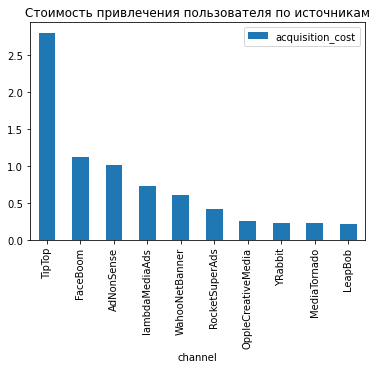

In [57]:
profiles_acquisition.plot.bar(x='channel', y='acquisition_cost', title='Стоимость привлечения пользователя по источникам')

Выводы: самыми дорогими каналами являются TipTop, FaceBoom и AdNonSense. Отметим, что пользователи с TipTop в 2,5 раза дороже FaceBoom, а пользователей привлекает меньше.

## 5. Окупаемость рекламы

### 5.1 Общая окупаемость рекламы

In [58]:
# зададим момент и горизонт анализа
observation_date = dt(2019, 11, 1).date()
horizon_days = 14

Органические пользователи не платят за рекламу, поэтому исключим их из анализа.

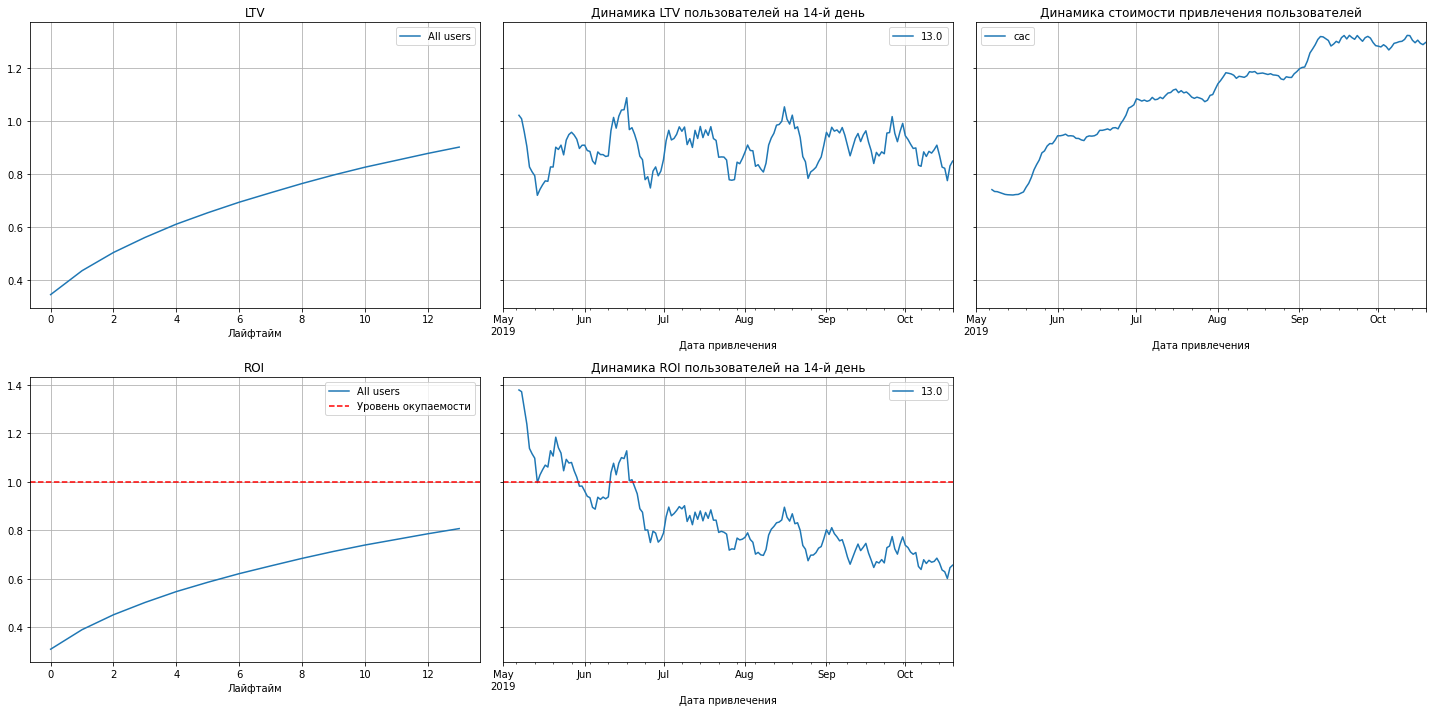

In [59]:
# исключаем органических пользователей, т.к. они не платят за рекламу

profiles_no_organic = profiles.query('channel != "organic"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic, orders, observation_date, horizon_days
)
    
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Выводы по графикам:
- Реклама не окупается (ROI  не превышает 80%)
- Коэффициент окупаемости стабильно падает с середины июня
- Расходы на рекламу за рассматриваемый период выросли больше, чем в два раза
- На LTV влияет сезонный фактор

### 5.2 Окупаемость рекламы с разбивкой по каналам

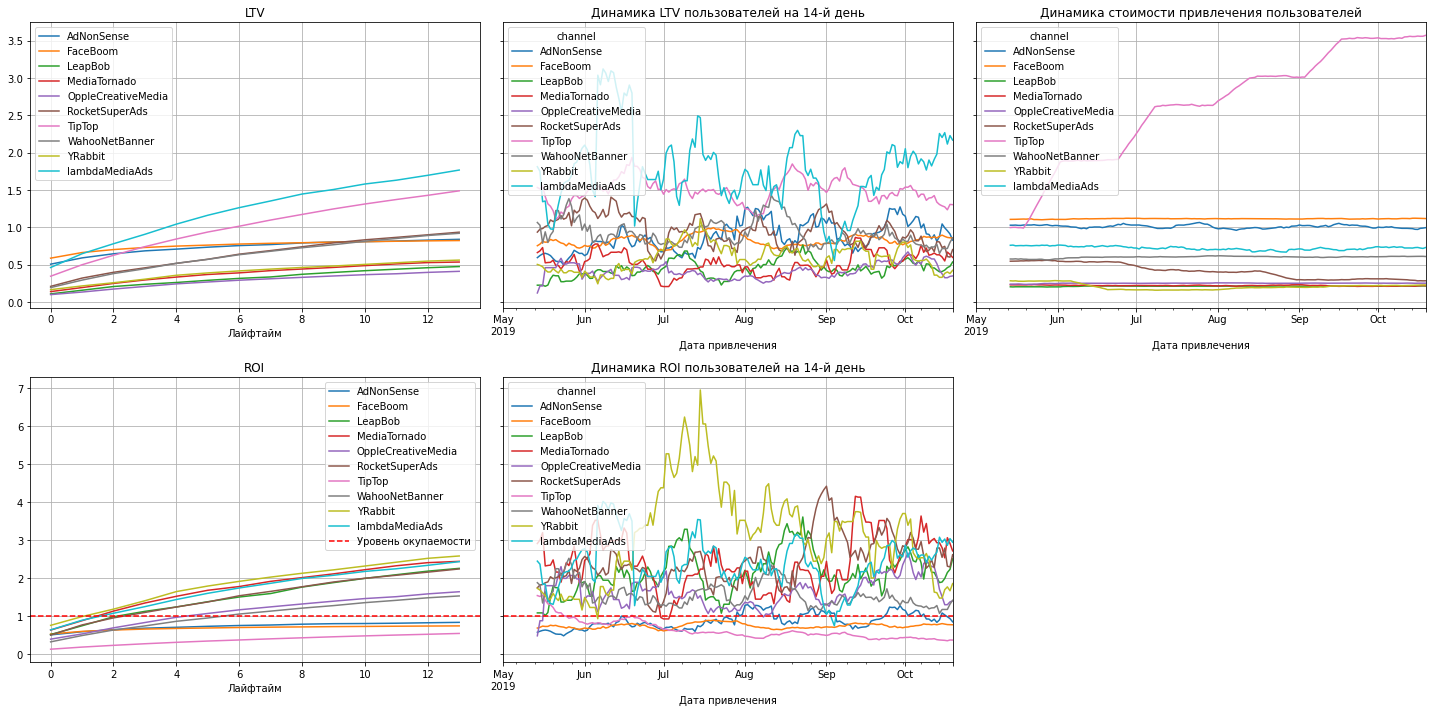

In [60]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Выводы:
- Большая часть каналов стабильно окупается, за исключением FaceBoom, AdNonSense и TipTop.
- Затраты на рекламу стабильны по всем каналам привлечения, кроме TipTop, на который в конце рассматриваемого периода тратится в 3,5 раза больше, чем в начале.

### 5.3 Окупаемость рекламы с разбивкой по странам

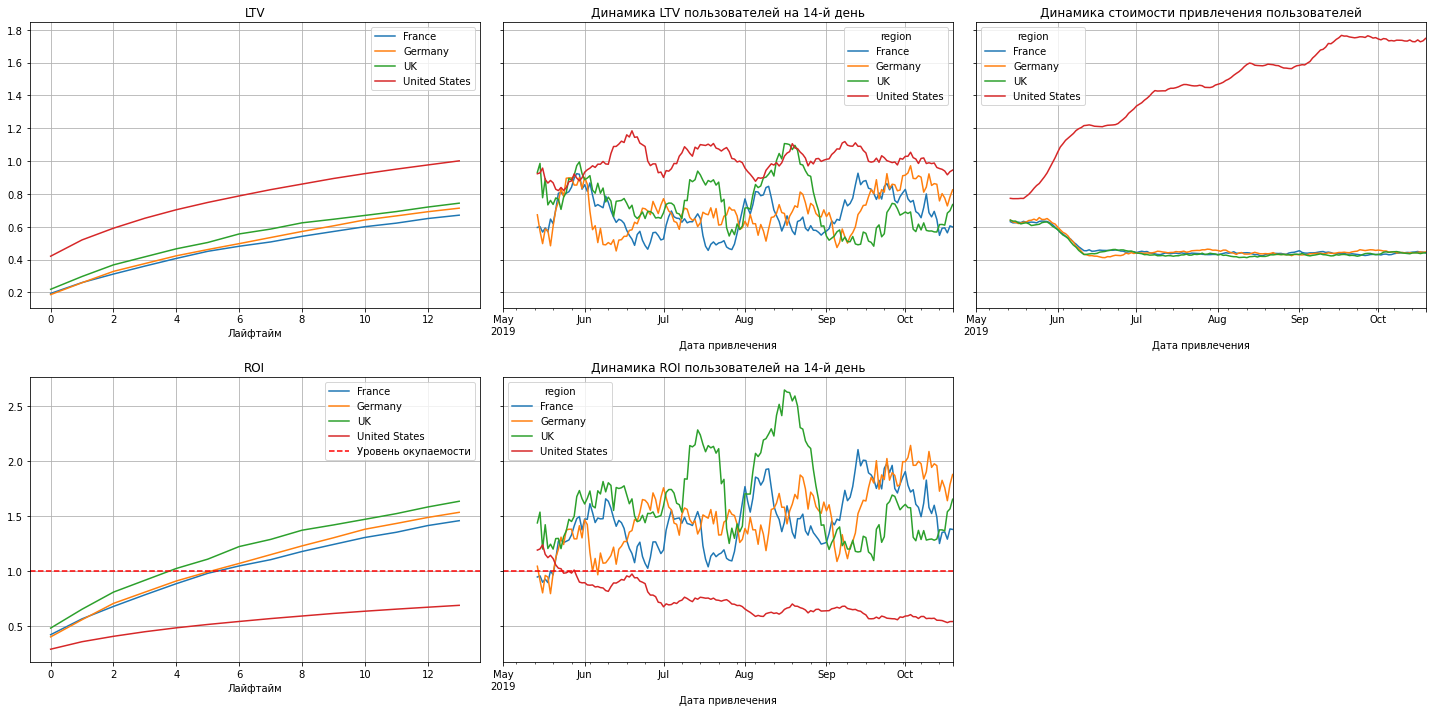

In [61]:
dimensions = ['region'] 

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

### 5.4 Окупаемость рекламы с разбивкой по устройствам

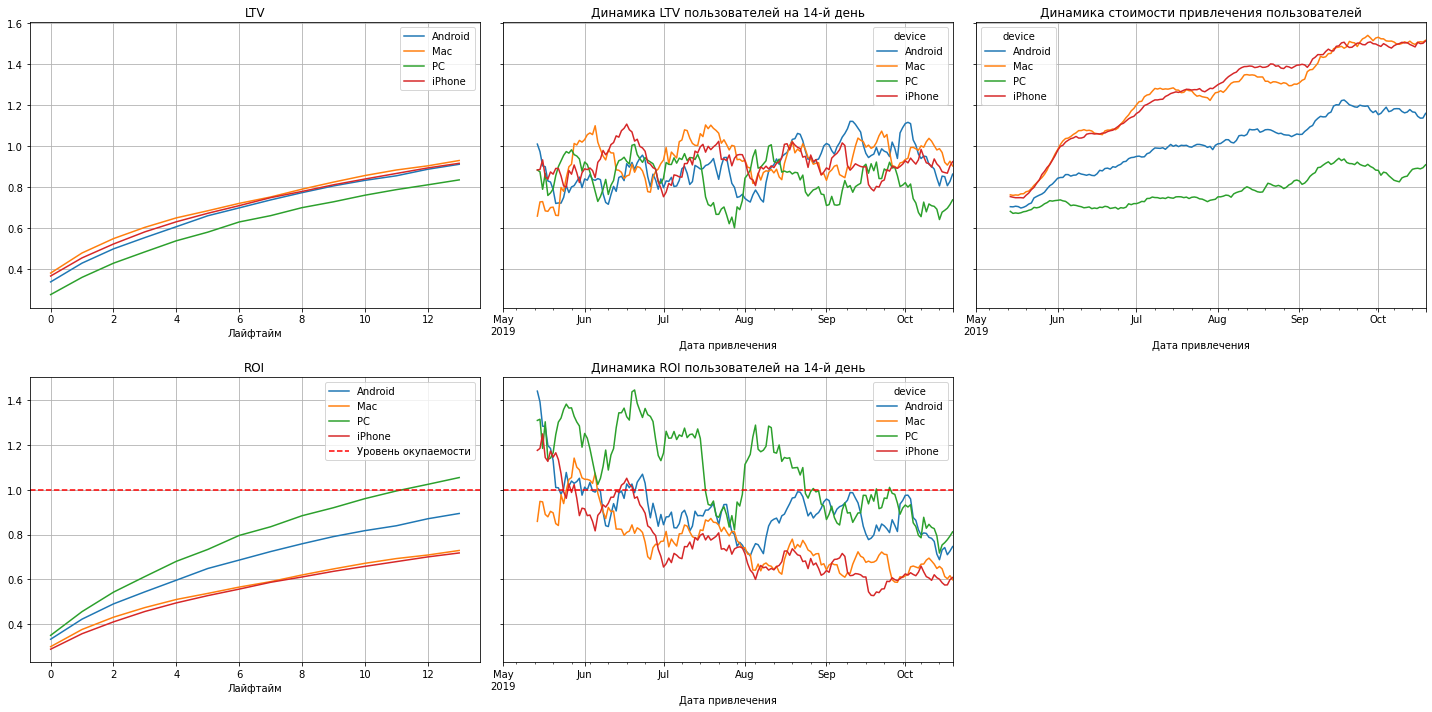

In [62]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_no_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Выводы: затраты на рекламу сильно выросли в США и снизились во всех остальных странах. При этом США - единственная страна, в которой реклама ни разу не окупилась. Если рассматривать ROI в динамике, окупаемость рекламы в США стабильно снижается с середины мая.

При этом во Франции, Германии и Великобритании, затраты на рекламу начинают окупаться на 4-6ой дни.

Единственное устройство, которое окупается в пределах двух недель (на 11-ый день) - это РС. Оно же самое дешевое в плане привлечения пользователей.

### Конверсия и удержание

#### Разбивка по устройствам

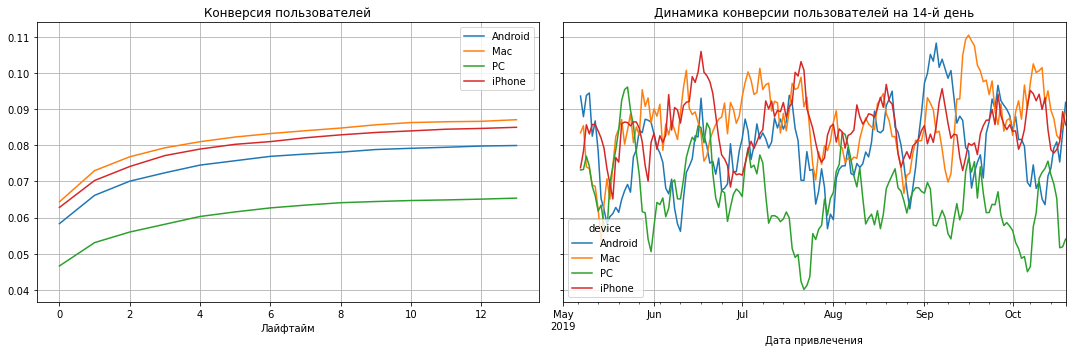

In [63]:
# конверсия
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

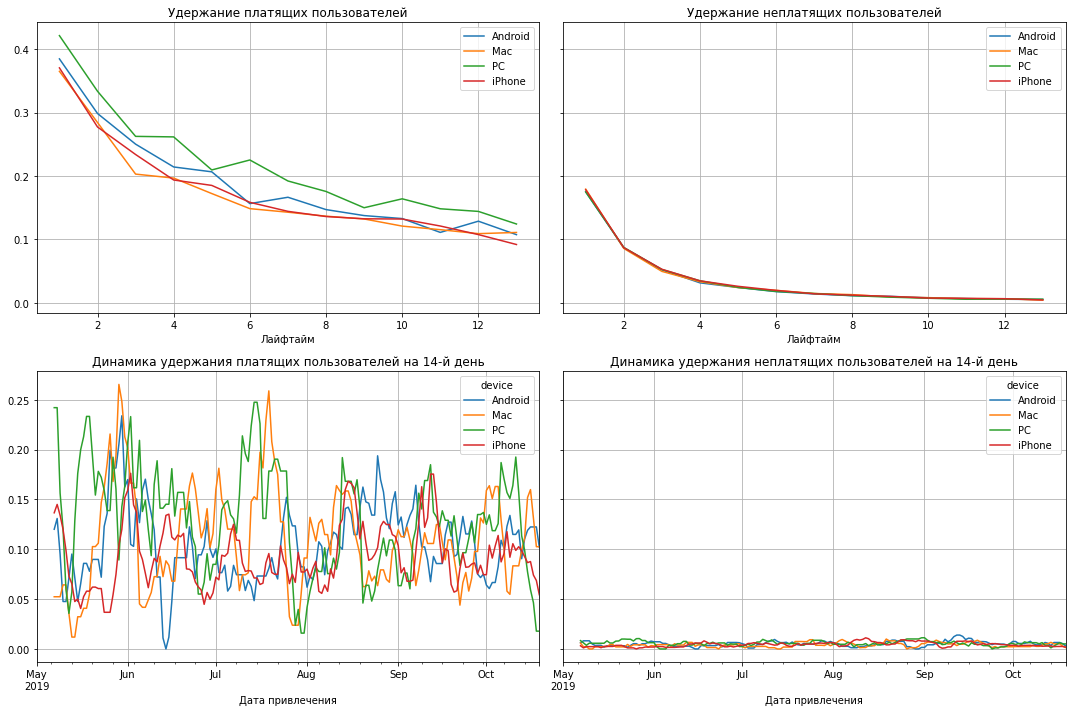

In [64]:
# удержание

retention_raw, retention_grouped, retention_history = get_retention(
   profiles_no_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Выводы:
- Явных проблем по устройствам не наблюдается, всё стабильно.
- Хуже всего конвертируется канал PС, при этом именно его пользователи удерживаются лучше всего.

#### Разбивка по каналам

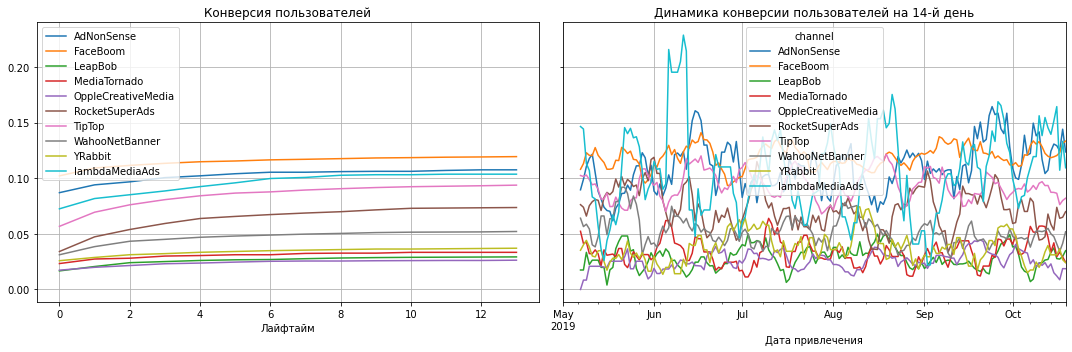

In [65]:
# конверсия
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

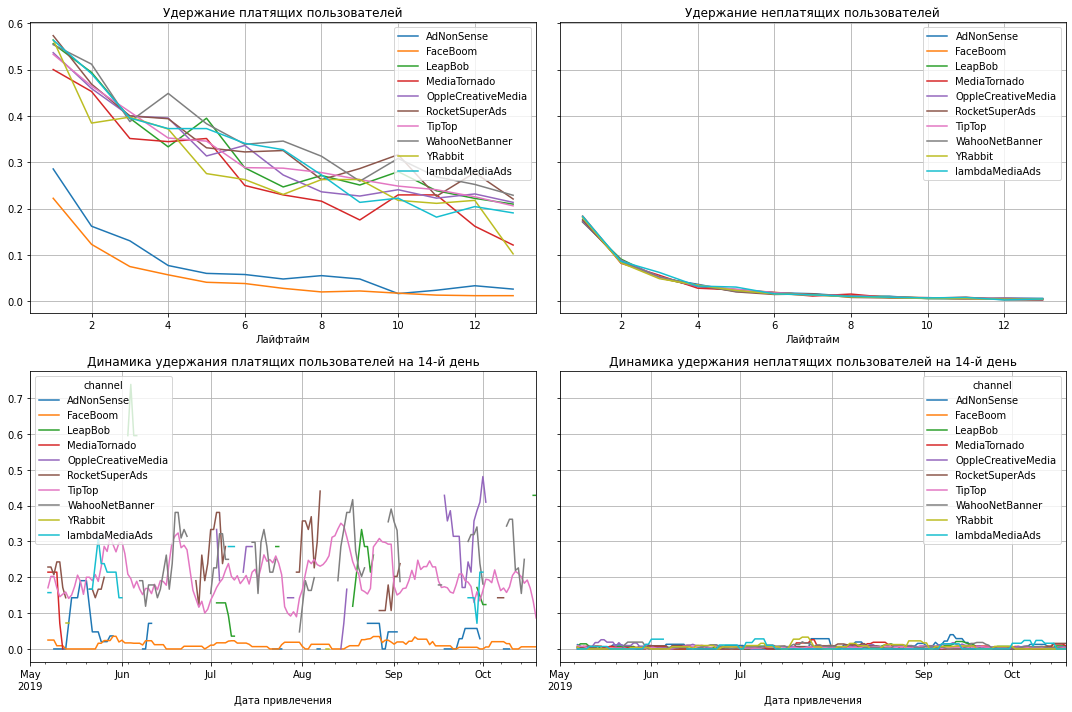

In [66]:
# удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Выводы: прослеживаются явные проблемы в удержании по каналам AdNonSense и FaceBoom, хотя именно эти каналы отличаются самой высокой конверсией.

#### Разбивка по странам

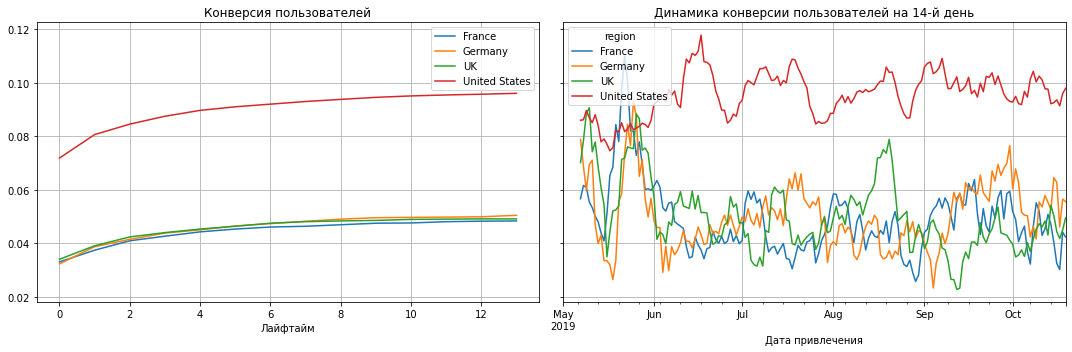

In [67]:
# конверсия

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_no_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

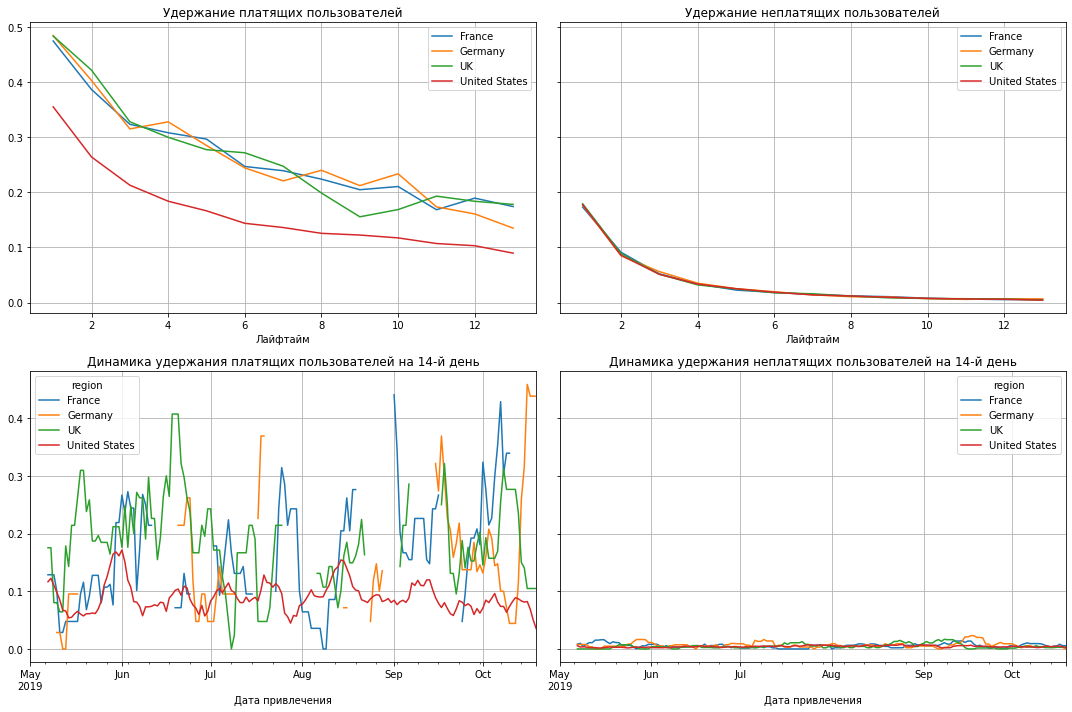

In [68]:
# удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_no_organic, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Выводы: на основании графиков снова можно сделать вывод о том, что США выделяются на фоне других стран. Они отличаются более высокой конвертируемостью, но самым низким удержанием пользователей.

Рассмотрим пользовательские метрики только в разрезе США:

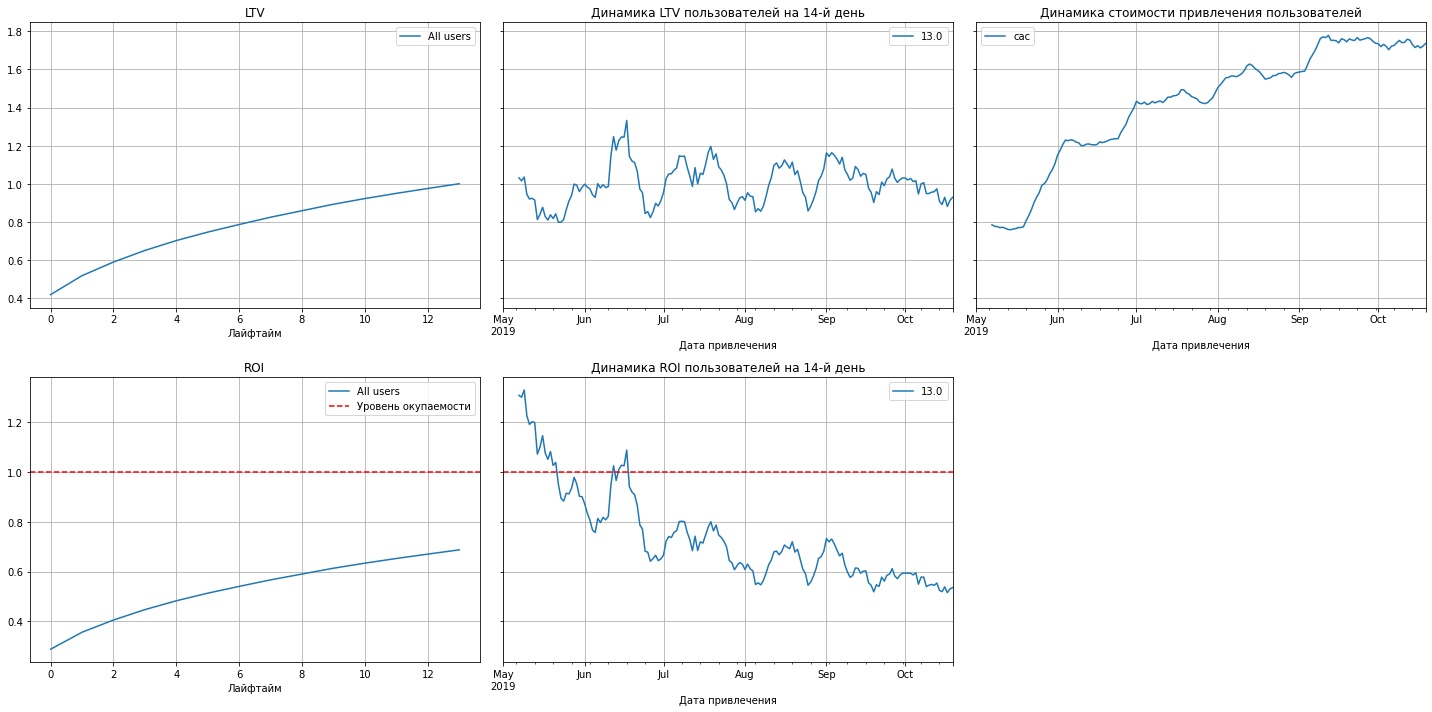

In [69]:
profiles_usa = profiles_no_organic.query('region == "United States"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days
)
    
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Выводы: мы видим ту же картину, что и на общих графиках - несмотря на двукратный рост затрат на рекламу в США, они даже близко не подходят к уровню окупаемости в заложенные две недели.

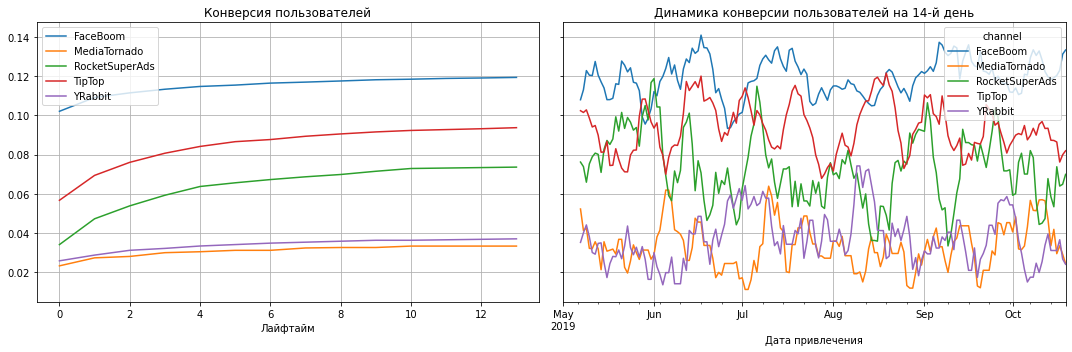

In [70]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

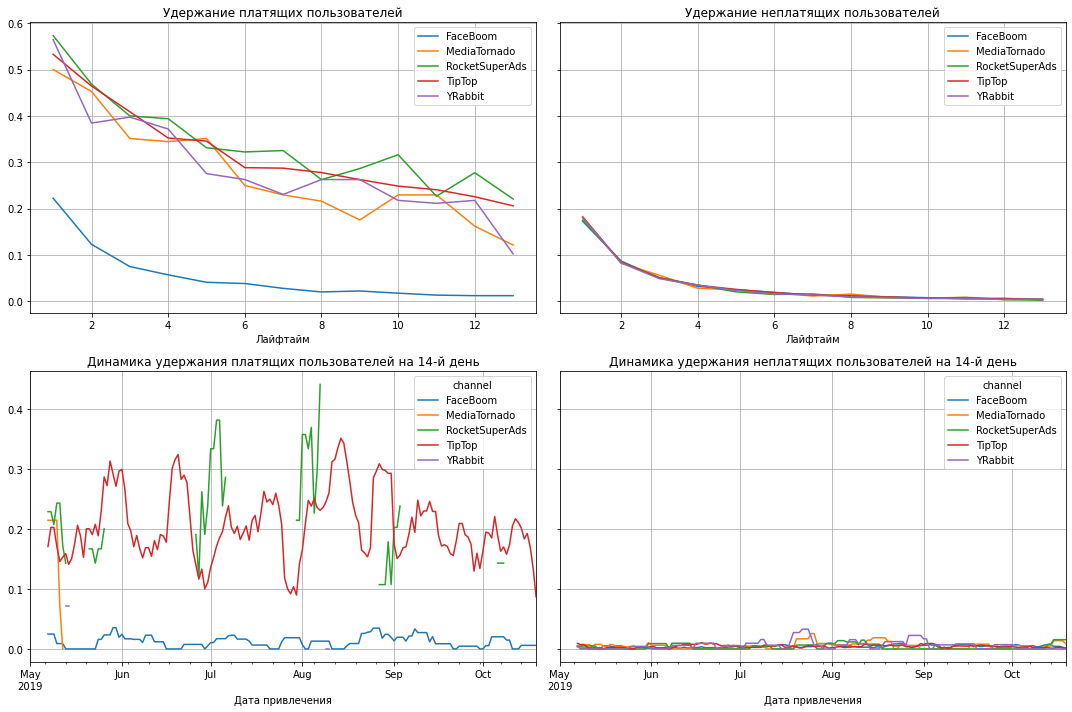

In [71]:
retention_raw, retention_grouped, retention_history = get_retention(
   profiles_usa, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Выводы: видим ту же картину - у канала FaceBoom стабильно высокая конверсия, но низкое удержание.

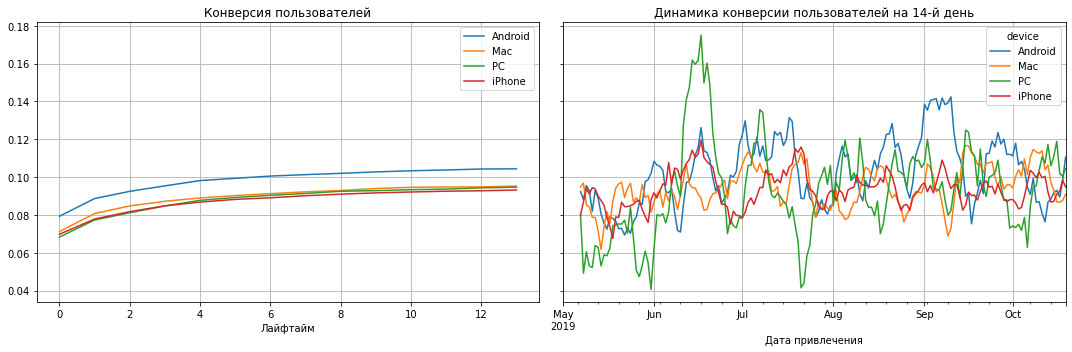

In [72]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

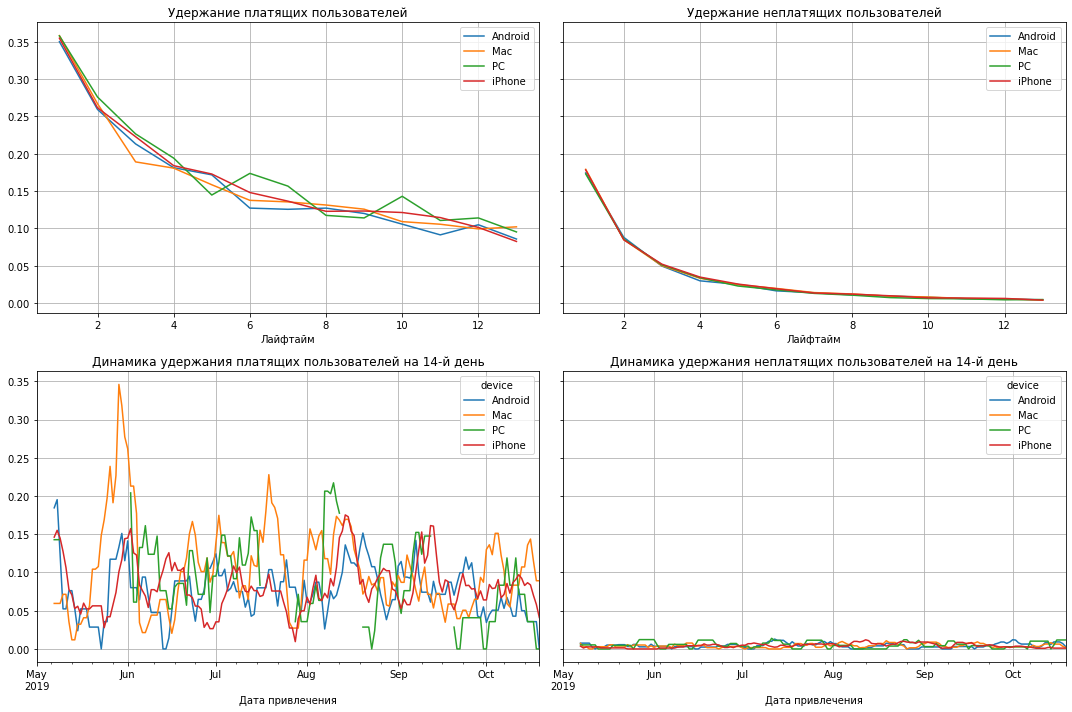

In [73]:
retention_raw, retention_grouped, retention_history = get_retention(
   profiles_usa, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

По устройствам мы видим, что у Android более высокая конверсия, а среди удержания нет ни явных лидеров, ни аутсайдеров.

Ответы на поставленные в исследовании вопросы:

1) Окупается ли реклама в целом?
- Нет, реклама не окупается за заложенные в бизнес-план две недели.

2) Какие устройства, страны и каналы могут снижать окупаемость рекламы?
- Из всех устройств на 11-ый день окупается только РС; остальные устройства не окупаются в первые две недели;
- Реклама окупается во всех странах на 4-6-ой дни, кроме США (не окупается в первые две недели);
- Каналы TipTop, FaceBoom, AdNonSense стабильно снижают окупаемость рекламы.

3) Чем могут быть вызваны проблемы окупаемости?

Причины проблем в окупаемости следует искать в США. Создается впечатление, что средства, вкладываемые в FaceBoom и TipTop обеспечивают неплохую конвертируемость, но не способны обеспечить удержание пользователей (особенно это касается FaceBoom). Постоянно растущие траты на TipTop никак не окупаются.

## Общие выводы

В рамках исследования мы заменили некорректные названия столбцов, преобразовали данные о времени, убедились в отсутствии пропусков и дубликатов. Затем создали пользовательские профили и определили, что абсолютное большинство пользователей приходится на США, из них доля платящих - 6,9%. Большая часть пользователей пришли к использованию приложения самостоятельно, на втором месте по привлечению FaceBoom, затем TipTop. Чаще всего пользователи приложения используют iPhone, реже всего - РС.
FaceBoom и TipTop являются самыми дорогими каналами по затратам на рекламу. Особенно выделятся в этом отношении TipTop, в который вкладывается больше всего средств, хотя клиентов он приносит меньше, чем FaceBoom.
Несмотря на количество привлеченных пользователей, самые дорогие каналы (FaceBoom, TipTop и AdNonSense) не окупаются в заложенные в бизнес-план две недели. Возможно, стоит обратить внимание на другие каналы, например, на YRabbit, окупающийся в первый же день и имеющий стабильно высокую динамику окупаемости в рассматриваемые полгода.
Также имеет смысл сосредоточиться на других странах (Франция, Германия и особенно Великобритания), реклама в которых окупается на 4-6ой дни, в отличие от США, где реклама в первые две недели не окупается вообще.
Несмотря на то, что РС находится на последнем месте по частоте использования, именно это устройство является единственным, которое окупается на 11-ый день.
Благодаря тратам на рекламу, FaceBoom и TipTop обеспечивают высокую конвертируемость, но они не способны обеспечить хорошее удержание пользователей. Особенно это касается FaceBoom в США.
Высокие затраты на рекламу в TipTop себя не оправдывают. Возможно, дело в плохо настроенной рекламе (ошибочно выбрана целевая аудитория, не учтено, что в TipTop преимущественно молодые пользователи).
Что касается США, стоит обратить внимание на канал RocketSuperAds, который находится на третьем месте по конверсии и отличается стабильно высоким удержанием.